In [148]:
# Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

### EDA и РЕСЕРЧ-АНАЛИЗ

In [149]:
# Загрузка данных
data = pd.read_csv('dataset.csv')

In [150]:
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [151]:
data.isnull().sum()

,0
Unnamed: 0,0
track_id,0
artists,1
album_name,1
track_name,1
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0


In [152]:
data = data.dropna()

In [153]:
data.isnull().sum()

,0
Unnamed: 0,0
track_id,0
artists,0
album_name,0
track_name,0
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0


In [154]:
# Unnamed: 0 - Индекс строки
# track_id - Уникальный идентификатор трека
# artists - Исполнитель или исполнители трека
# album_name - Название альбома, в котором содержится трек
# track_name - Название трека
# popularity - Популярность трека, выраженная в числовом значении
# duration_ms - Длительность трека в миллисекундах
# explicit - Флаг, указывающий на наличие ненормативной лексики в треке (True/False)
# danceability - Танцевальность трека, числовой показатель
# energy - Энергичность трека, числовой показатель
# key - Тональность трека, выраженная числовым значением
# loudness - Громкость трека в децибелах
# mode - Лад трека (мажорный - 1, минорный - 0)
# speechiness - Речевитость трека, числовой показатель
# acousticness - Акустичность трека, числовой показатель
# instrumentalness - Инструментальность трека, числовой показатель
# liveness - Живость трека, числовой показатель
# valence - Позитивность трека, числовой показатель
# tempo - Темп трека в ударах в минуту (BPM)
# time_signature - Размер такта трека
# track_genre - Жанр трека

In [155]:
data.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113999.000000,113999.000000,1.139990e+05,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000
mean,56999.421925,33.238827,2.280312e+05,0.566801,0.641383,5.309126,-8.258950,0.637558,0.084652,0.314907,0.156051,0.213554,0.474066,122.147695,3.904034
std,32909.243463,22.304959,1.072961e+05,0.173543,0.251530,3.559999,5.029357,0.480708,0.105733,0.332522,0.309556,0.190378,0.259261,29.978290,0.432623
min,0.000000,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.500000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218500,4.000000
50%,56999.000000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.500000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.597500,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [156]:
data.dtypes

,0
Unnamed: 0,int64
track_id,object
artists,object
album_name,object
track_name,object
popularity,int64
duration_ms,int64
explicit,bool
danceability,float64
energy,float64


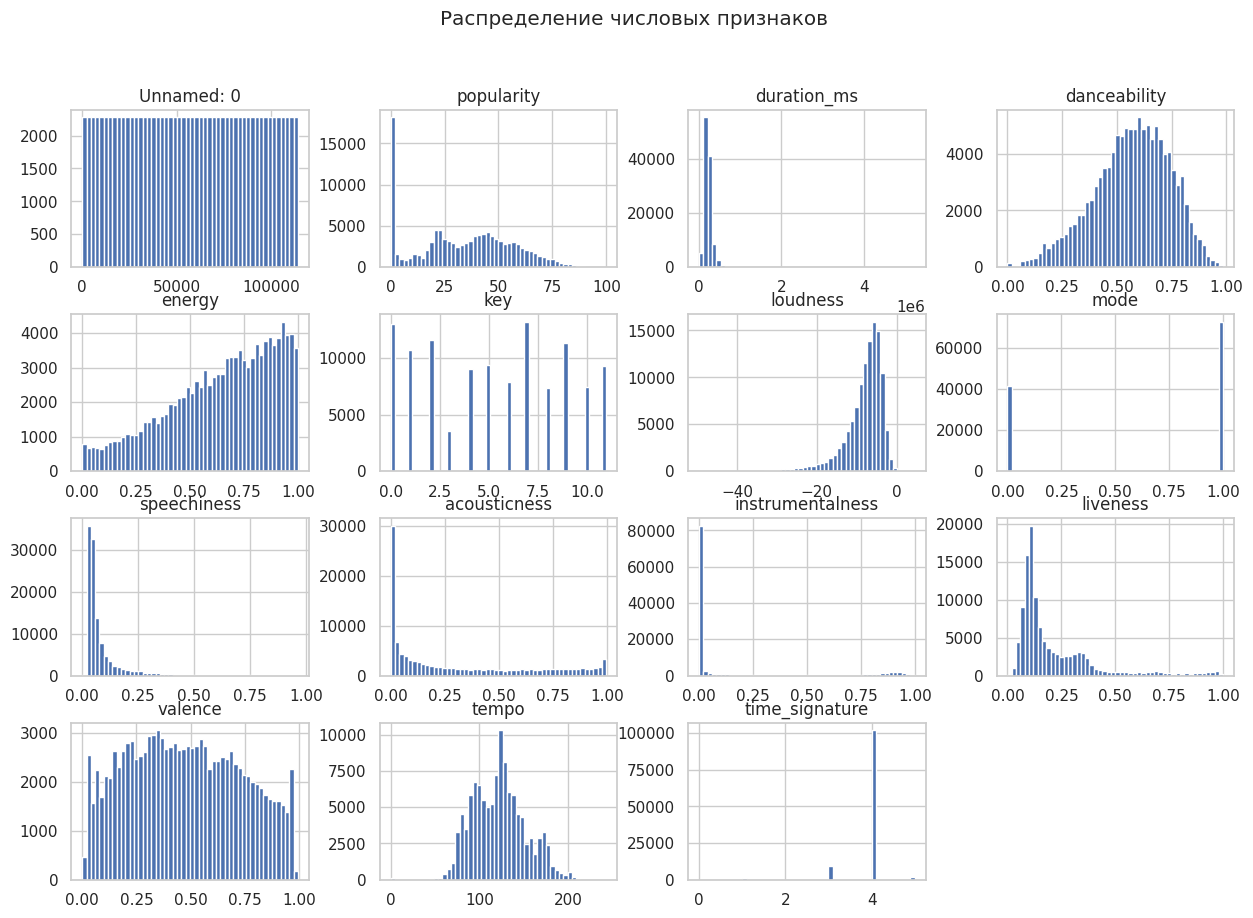

In [157]:
# Построение гистограмм для числовых признаков
data.hist(bins=50, figsize=(15, 10))
plt.suptitle('Распределение числовых признаков')
plt.show()
# Ось X - диапазон значений признака
# Ось Y - частотность

Большинство числовых признаков имеют ассиметричное распределение

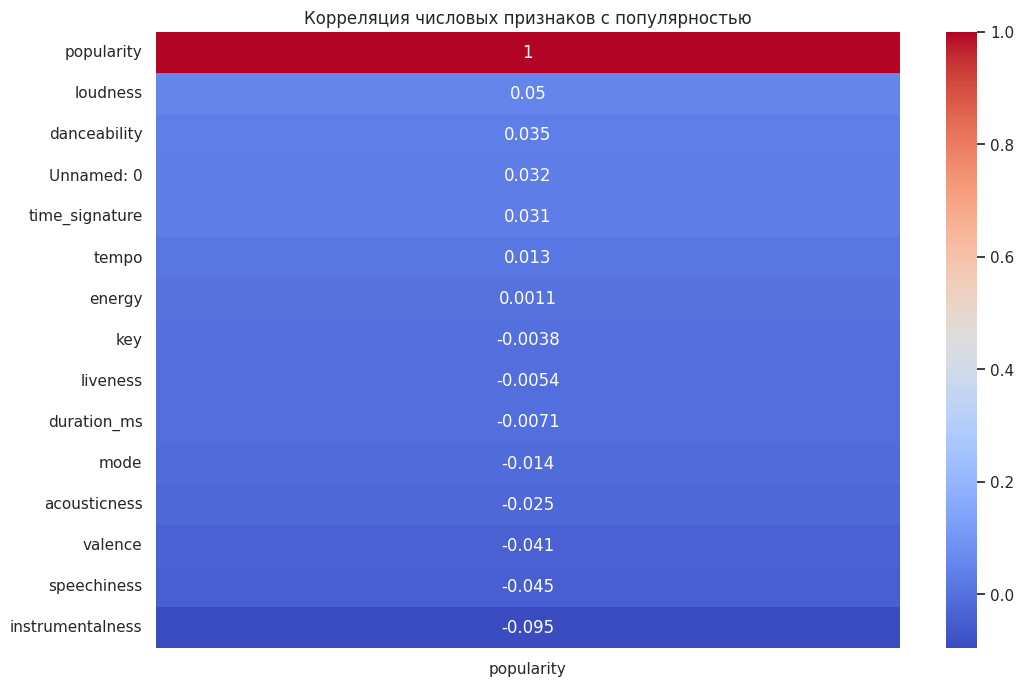

In [158]:
# Выбор только числовых столбцов
numeric_df = data.select_dtypes(include=['int64', 'float64'])

# Вычисление корреляционной матрицы
correlation_matrix = numeric_df.corr()

# Визуализация корреляции с популярностью
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['popularity']].sort_values(by='popularity', ascending=False), annot=True, cmap='coolwarm')
plt.title('Корреляция числовых признаков с популярностью')
plt.show()

Наибольшая корреляция с популярностью наблюдается у признака loudness (0.05), но она все равно очень слабая.

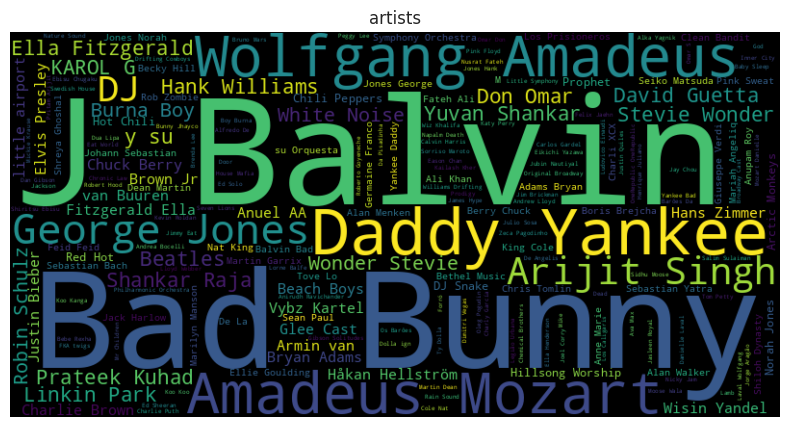

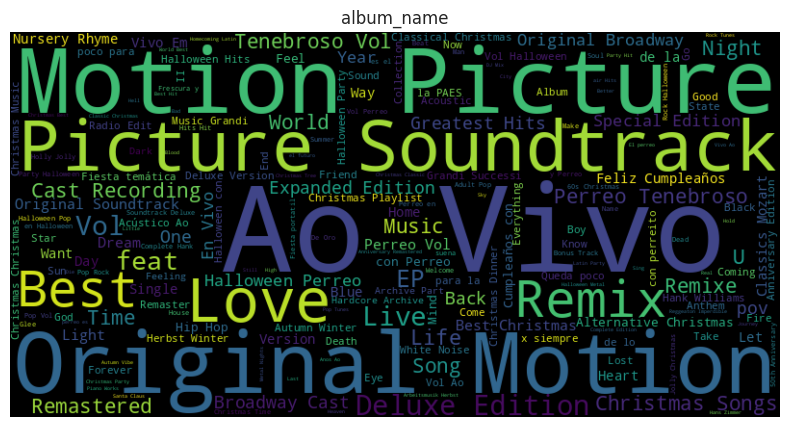

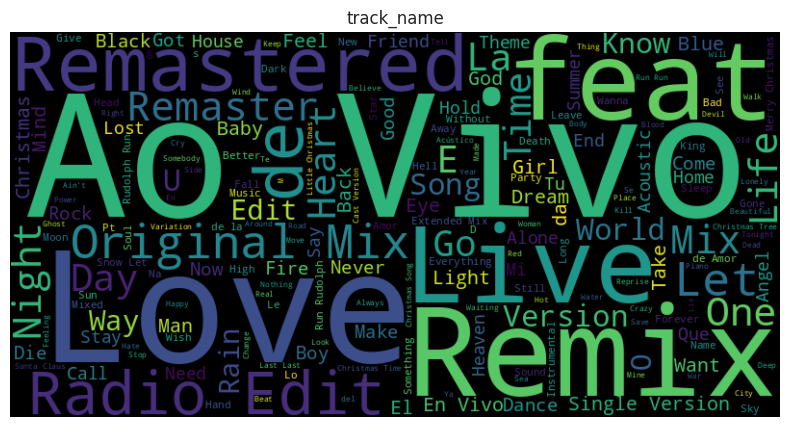

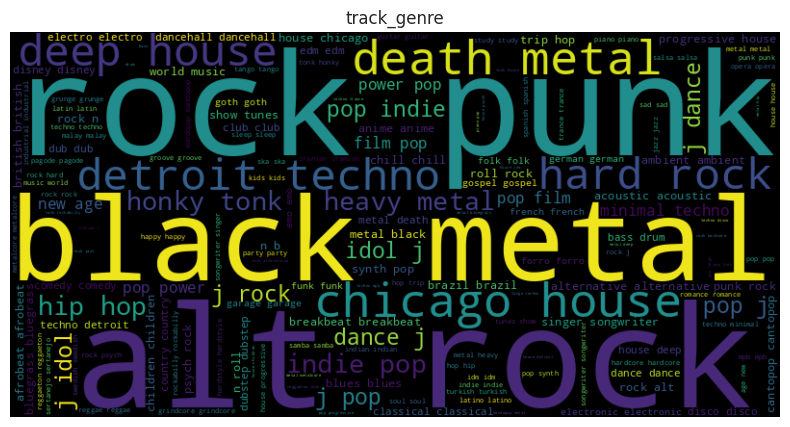

In [159]:
categorical_features = ['artists', 'album_name', 'track_name', 'track_genre']

for feature in categorical_features:
    # Объединяем все значения в одну строку
    text = ' '.join(data[feature].astype(str))

    # Создаем объект WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

    # Отображаем облако слов
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'{feature}')
    plt.axis('off')
    plt.show()

### Простая модель

In [160]:
data['explicit']

,explicit
0,False
1,False
2,False
3,False
4,False
...,...
113995,False
113996,False
113997,False
113998,False


In [161]:
# Создание новых признаков
data['explicit'] = data['explicit'].astype(int)
data['duration_min'] = data['duration_ms'] / 60000

In [162]:
# Определяем числовые и категориальные признаки
numeric_features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
                    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
                    'time_signature', 'duration_min', 'explicit']
categorical_features = ['artists', 'album_name', 'track_name', 'track_genre']

In [163]:
# Создаем трансформеры для числовых и категориальных признаков
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Объединяем трансформеры в ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [164]:
# Целевая переменная
y = data['popularity']

# Признаки (удаляем целевую переменную из набора данных)
X = data.drop('popularity', axis=1)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем и обучаем модель
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

model.fit(X_train, y_train)

# Предсказание и оценка модели
y_pred = model.predict(X_test)

# Метрики оценки
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 98.88812941219457
Mean Absolute Error (MAE): 5.986078051994843
R-squared (R²): 0.8006647294566704


### Эксперименты с моделями

In [165]:
# Создание конвейера для Ridge
ridge_model = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', Ridge())])

# Обучение модели
ridge_model.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred_ridge = ridge_model.predict(X_test)

# Вычисление метрик
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Вывод результатов
print(f'Ridge Regression MSE: {mse_ridge}')
print(f'Ridge Regression MAE: {mae_ridge}')
print(f'Ridge Regression R²: {r2_ridge}')

Ridge Regression MSE: 66.35903330582475
Ridge Regression MAE: 5.617362545826581
Ridge Regression R²: 0.8662357561454772


In [166]:
# Создание конвейера для XGBoost
xgboost_model = Pipeline(steps=[('preprocessor', preprocessor),
                                ('regressor', XGBRegressor())])

# Обучение модели
xgboost_model.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred_xgboost = xgboost_model.predict(X_test)

# Вычисление метрик
mse_xgboost = mean_squared_error(y_test, y_pred_xgboost)
mae_xgboost = mean_absolute_error(y_test, y_pred_xgboost)
r2_xgboost = r2_score(y_test, y_pred_xgboost)

# Вывод результатов
print(f'XGBoost Regression MSE: {mse_xgboost}')
print(f'XGBoost Regression MAE: {mae_xgboost}')
print(f'XGBoost Regression R²: {r2_xgboost}')

XGBoost Regression MSE: 275.10364139998984
XGBoost Regression MAE: 13.006502001376397
XGBoost Regression R²: 0.4454556107521057


In [167]:
# Создание конвейера для дерева решений
decision_tree_model = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('regressor', DecisionTreeRegressor())])

# Обучение модели
decision_tree_model.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Вычисление метрик
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
mae_decision_tree = mean_absolute_error(y_test, y_pred_decision_tree)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)

# Вывод результатов
print(f'Decision Tree Regression MSE: {mse_decision_tree}')
print(f'Decision Tree Regression MAE: {mae_decision_tree}')
print(f'Decision Tree Regression R²: {r2_decision_tree}')

Decision Tree Regression MSE: 315.36328947368423
Decision Tree Regression MAE: 9.739078947368421
Decision Tree Regression R²: 0.3643015900863109


### Ridge - лучшая модель

In [168]:
# Кросс-валидация для Ridge
cv_results = cross_validate(ridge_model, X, y, cv=KFold(n_splits=5, shuffle=True, random_state=42),
                            scoring=('neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'))

print("Cross-Validation Results for Ridge:")
print(f"Mean MSE: {-cv_results['test_neg_mean_squared_error'].mean()}")
print(f"Mean MAE: {-cv_results['test_neg_mean_absolute_error'].mean()}")
print(f"Mean R²: {cv_results['test_r2'].mean()}")

Cross-Validation Results for Ridge:
Mean MSE: 67.03523049501403
Mean MAE: 5.629913443809781
Mean R²: 0.8652507767756245


Среднеквадратичная ошибка (MSE): 67.035. Эта метрика измеряет среднее значение квадратов ошибок, то есть разницу между предсказанными и фактическими значениями. Чем ниже значение MSE, тем лучше модель справляется с предсказаниями. В среднем квадрат ошибки составляет около 67.

Средняя абсолютная ошибка (MAE): 5.630. Эта метрика измеряет среднюю величину ошибок в предсказаниях, игнорируя их знак. Это более интерпретируемая метрика, так как она выражена в тех же единицах, что и целевая переменная. В среднем модель ошибается на 5.6 единиц.

Коэффициент детерминации (R²): 0.865. Эта метрика показывает, какая доля дисперсии зависимой переменной объясняется моделью. Значение 0.865 указывает на то, что модель объясняет 86.5% вариации в данных. Это довольно высокий показатель, что говорит о хорошей способности модели объяснять данные.

In [169]:
# Извлечение коэффициентов из модели Ridge
coefficients = ridge_model.named_steps['regressor'].coef_

# Получение имен признаков: числовые + категориальные (после one-hot кодирования)
feature_names = numeric_features + list(
    ridge_model.named_steps['preprocessor'].transformers_[1][1]
    .named_steps['onehot'].get_feature_names_out(categorical_features))

# Создание DataFrame для отображения важности признаков
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': coefficients
})

feature_importance['Importance'] = feature_importance['Importance'].abs()
feature_importance

,Feature,Importance
0,danceability,0.623917
1,energy,0.706128
2,key,0.016191
3,loudness,0.558233
4,mode,0.131744
...,...,...
130670,track_genre_techno,0.240506
130671,track_genre_trance,4.977300
130672,track_genre_trip-hop,3.517597
130673,track_genre_turkish,3.033190


In [170]:
# Словарь для хранения важности изначальных признаков
original_feature_importance = {}

# Обработка числовых признаков
for feature in numeric_features:
    original_feature_importance[feature] = feature_importance.loc[feature_importance['Feature'] == feature, 'Importance'].sum()

# Обработка категориальных признаков
for feature in categorical_features:
    # Найти все one-hot закодированные версии этого признака
    one_hot_features = feature_importance[feature_importance['Feature'].str.startswith(feature + '_')]
    # Суммировать их важности
    original_feature_importance[feature] = one_hot_features['Importance'].sum()

original_feature_importance

{'danceability': 0.6239168489643496,
 'energy': 0.7061279608494653,
 'key': 0.01619117443362761,
 'loudness': 0.5582327147154746,
 'mode': 0.1317443465012258,
 'speechiness': 0.5574817048909338,
 'acousticness': 0.23197492544954024,
 'instrumentalness': 0.7258402133898123,
 'liveness': 0.3683754777302215,
 'valence': 0.4362081631561212,
 'tempo': 0.03492478719015313,
 'time_signature': 0.11877653933902999,
 'duration_min': 0.4627989546395117,
 'explicit': 0.3817233300028764,
 'artists': 85242.79898684187,
 'album_name': 131599.47520594863,
 'track_name': 137948.38997499572,
 'track_genre': 879.9024970930662}

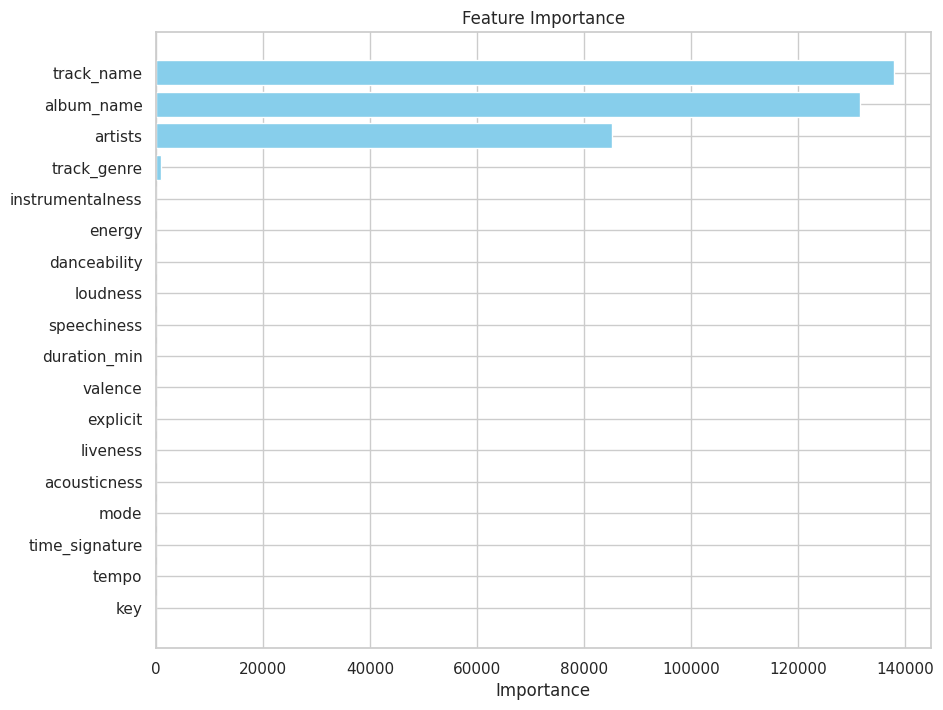

In [171]:
import matplotlib.pyplot as plt

# Сортируем признаки по важности
sorted_features = sorted(original_feature_importance.items(), key=lambda x: x[1], reverse=True)

# Разделяем признаки и их важности для построения графика
features, importances = zip(*sorted_features)

# Создаем график
plt.figure(figsize=(10, 8))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Инвертируем ось Y, чтобы наиболее важные признаки были сверху
plt.show()